In [2]:
#ライブラリインポート
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import re
from pandas import Series,DataFrame
from scipy.fftpack import fft
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import LocalOutlierFactor

In [12]:
#-------------------------------------
# 初期設定
#-------------------------------------

#データのディレクトリ設定
#★★★パスをご自身の環境に合わせて書き換えてください。
expression_normal   = r'C:\Users\kajiw\Desktop\1_仕事\16_イベント登壇\DGLAB講座\振動データサンプル\正常\*.csv'
expression_gear     = r'C:\Users\kajiw\Desktop\1_仕事\16_イベント登壇\DGLAB講座\振動データサンプル\ギヤ異常\*.csv'
expression_bearing  = r'C:\Users\kajiw\Desktop\1_仕事\16_イベント登壇\DGLAB講座\振動データサンプル\ベアリング異常\*.csv'

#サンプリング周波数(Hz)
freq = 76800

#サンプリング時間(s)
sampling_time = 10

#FFT間隔(s)
fft_interval = 0.1

#グラフスタイル指定
plt.style.use('ggplot')

In [26]:
#------------------------------------
# データ読み込み用関数定義
#------------------------------------

def file_number_sort(value):
    pattern = re.compile(r'\d+')
    file_number = int(pattern.findall(value).pop())
    return file_number

def stack_acc_data(expression):
    df_acc = pd.DataFrame()
    for f in sorted(glob.glob(expression), key = file_number_sort):
        df = #★★★csvファイル読込み
        accs = #★★★dfの最初の列の4行目以降を読み込みfloatに変換
        #★★★df_accとaccsを縦に結合する
        
    return df_acc.reset_index(drop = True)


In [27]:
#--------------------------------
# データ読み込み
#--------------------------------
df_acc_normal  = stack_acc_data(expression_normal)
df_acc_gear    = stack_acc_data(expression_gear)
df_acc_bearing = stack_acc_data(expression_bearing)

In [29]:
#--------------------------------
# 読み込みデータ確認
#--------------------------------
print(df_acc_normal.shape)
print(df_acc_gear.shape)
print(df_acc_bearing.shape)

(768000, 1)
(768000, 1)
(768000, 1)


In [ ]:
#-----------------------------------------
# データ確認
#-----------------------------------------

In [30]:
df_acc_normal.head()

,0
0,-17.840282
1,-21.697704
2,-24.171663
3,-24.765739
4,-22.869579


In [31]:
df_acc_gear.head()

,0
0,24.480478
1,23.330982
2,19.434904
3,11.256194
4,0.859873


In [35]:
df_acc_bearing.head()

,0
0,0.782321
1,0.426283
2,0.182142
3,1.708021
4,2.745619


可視化によるデータ確認

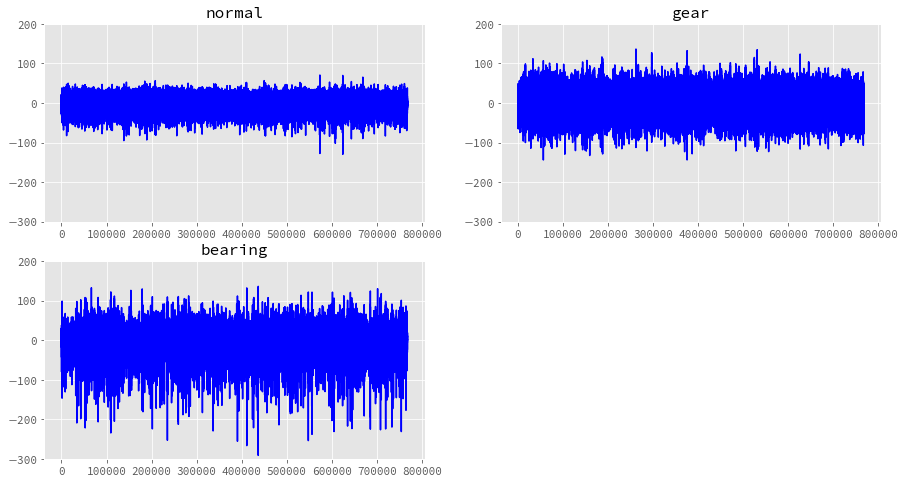

In [36]:
#---------------------------------------------------------------------
# 正常、ギア異常、ベアリング異常それぞれでFFT前の振動データを可視化
#---------------------------------------------------------------------
plt.figure(figsize = (15, 8))
i = 1
df_acc_list = [df_acc_normal, df_acc_gear, df_acc_bearing]
types_list = ['normal', 'gear', 'bearing']
for types, df in :　#★★★
    plt.subplot(2, 2, )　#★★★
    data_n = df.shape[0]
    plt.plot(range(data_n), df.values, color = 'b')
    plt.title(types)
    plt.ylim(-300, 200)
    i += 1
plt.show()

In [37]:
#--------------------------------
# FFT実行関数定義
#--------------------------------
def fft(fs, data):
    D = 1 / fs
    N = len(data)
    fft = np.fft.fft(data) 
    freqs = np.fft.fftfreq(N, d = D) #周波数軸算出
    amplitude = np.abs(fft) #振幅強度算出
    target_idx = np.where(freqs >= 0)[0] 
    return amplitude[target_idx], freqs[target_idx]

In [38]:
#-----------------------------
# FFT実行
#-----------------------------
amplitude_normal, freqs_normal   = fft(fs = freq, data = df_acc_normal.values.ravel())
amplitude_gear, freqs_gear       = fft(fs = freq, data = df_acc_gear.values.ravel())
amplitude_bearing, freqs_bearing = fft(fs = freq, data = df_acc_bearing.values.ravel())


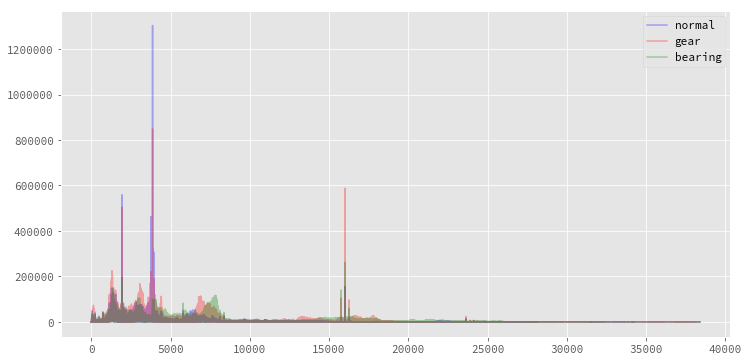

In [41]:
#--------------------------------
# FFT結果可視化
#--------------------------------
plt.figure(figsize = (12, 6))
plt.plot(freqs_normal, amplitude_normal, color = 'b', alpha = 0.3, label = 'normal')
#★★★ギアとベアリングも同じように書いてみる
#★★★凡例の表示設定
plt.show()

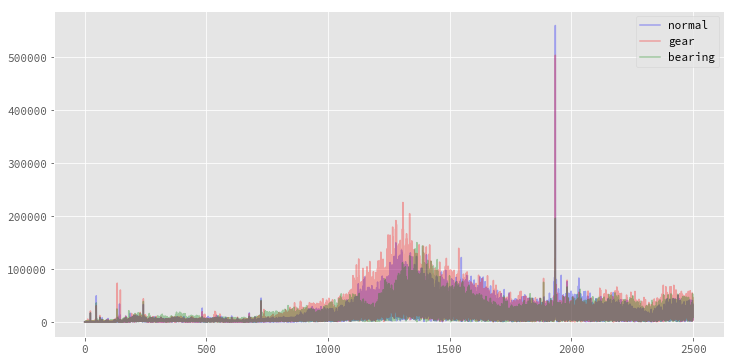

In [310]:
#-----------------------------------
# 2500Hz以下に絞って可視化
#-----------------------------------
plt.figure(figsize = (12, 6))
idx = #★★★2500Hz以下のインデックス取得しidx変数に格納してください
plt.plot(freqs_normal[idx], amplitude_normal[idx], color = 'b', alpha = 0.3, label = 'normal')
#★★★一つ上のセルと同様の内容記載をidxを指定して記載
plt.show()

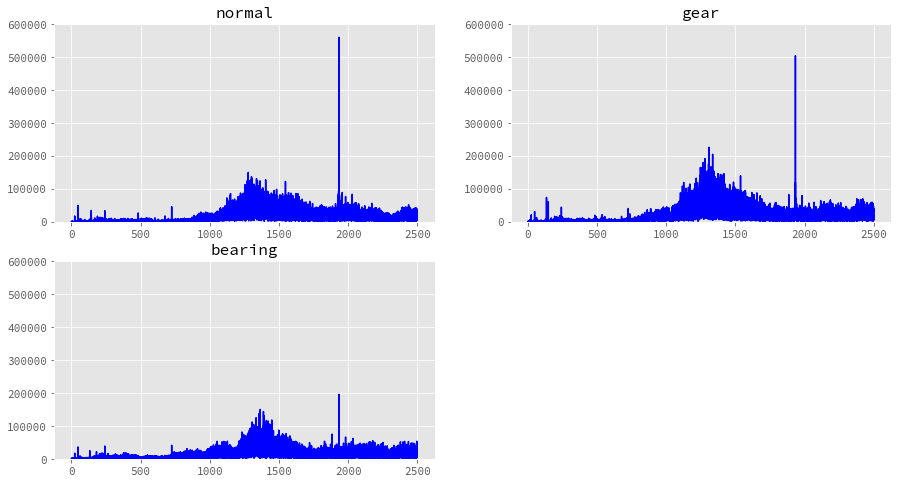

In [311]:
#-------------------------------------------------
# 正常、ギア異常、ベアリング異常それぞれで可視化
#-------------------------------------------------
plt.figure(figsize = (15, 8))
i = 1
amplitude_list = [amplitude_normal[idx], amplitude_gear[idx], amplitude_bearing[idx]]
freqs_list = [freqs_normal[idx], freqs_gear[idx], freqs_bearing[idx]]
types_list = ['normal', 'gear', 'bearing']
for types, freqs, amplitude in zip(types_list, freqs_list, amplitude_list):
    plt.subplot(2, 2, i)
    plt.plot(freqs, amplitude, color = 'b')
    plt.title(types)
    plt.ylim(0, 600000)
    i += 1
plt.show()

振動データ整形

In [471]:
#--------------------------------------------------------
# 加速度データをFFT間隔(今回は0.1s)ずつ切り出す関数定義
#--------------------------------------------------------
def divide_acc_data(fft_interval, df):
    fft_interval = fft_interval
    arr_acc = #★★★dfを一次元配列に変換
    sample_num = int(sampling_time / fft_interval)
    n = int(freq * fft_interval)
    #★★★データを0.1sを1行として切り出し100行分データ作成
    return data

In [472]:
#---------------------------------------------------------------------------------
# 1行が0.1s分の振動データになっているデータを正常、ギア異常、ベアリング異常で作成
#---------------------------------------------------------------------------------
data_normal  = divide_acc_data(fft_interval, df_acc_normal)
data_gear    = divide_acc_data(fft_interval, df_acc_gear)
data_bearing = divide_acc_data(fft_interval, df_acc_bearing)

In [495]:
#--------------------------
# 確認
#--------------------------
print(data_normal.shape)
print(data_gear.shape)
print(data_bearing.shape)

(100, 7680)
(100, 7680)
(100, 7680)


In [473]:
#-----------------------------------------
# FFTを実行し結果をDFとして返す関数定義
#-----------------------------------------

def convert_fft_df(data, freq):
    fft_result = []
    for i in range(data.shape[0]):
        _amplitude, _ = fft(fs = freq, data = data[i, :])
        fft_result.append(_amplitude)
    df = pd.DataFrame(fft_result)
    return df
    

In [474]:
#--------------------------------------------------------
# FFT後のDFを正常、ギア異常、ベアリング異常でそれぞれ取得
#--------------------------------------------------------
df_normal  = convert_fft_df(data_normal, freq = freq)
df_gear    = convert_fft_df(data_gear, freq = freq)
df_bearing = convert_fft_df(data_bearing, freq = freq)

SVMによる教師ありでの正常、ベアリング異常の判定モデル作成

In [475]:
#-------------------------------------------------
# 正常を0, ベアリング異常を1として教師ラベル作成
#-------------------------------------------------

#★★★type列を作成し正常に0, ベアリング異常を1とする

In [476]:
#---------------------------
# 正常データ確認
#---------------------------
df_normal.head()

,0,1,2,3,4,5,6,7,8,9,...,3831,3832,3833,3834,3835,3836,3837,3838,3839,type
0,83.822911,118.871264,203.083493,125.089567,187.653030,631.346621,116.131787,83.191407,43.301292,56.712198,...,11.375019,10.989095,7.300296,10.749205,9.731107,6.394602,10.136839,11.324913,8.106285,0
1,109.996297,117.454990,179.006125,41.363042,49.468171,749.193839,151.957357,301.571704,136.569352,172.180920,...,7.549093,11.123942,14.597836,10.738963,10.151023,9.304855,11.451234,15.223149,12.187710,0
2,116.513302,124.740223,207.226287,108.013687,155.761905,634.656567,133.726611,71.831449,118.674827,28.944292,...,5.798136,3.817545,4.559839,3.606908,1.578546,3.349416,3.764061,3.721364,4.844978,0
3,23.326419,5.506132,110.984710,143.610417,28.255866,745.023021,192.631427,278.755234,122.676224,217.034757,...,24.535422,26.741210,31.279449,27.258065,29.524702,27.931245,30.773952,32.005174,26.478874,0
4,19.371278,21.540440,98.512677,156.952498,177.752543,600.804264,125.460959,56.740275,72.836385,49.914823,...,14.175601,13.129584,16.041424,16.080621,14.749943,12.914153,18.312530,16.505467,16.544664,0


In [477]:
#-----------------------------
# ベアリング異常データ確認
#-----------------------------
df_bearing.head()

,0,1,2,3,4,5,6,7,8,9,...,3831,3832,3833,3834,3835,3836,3837,3838,3839,type
0,56.657474,157.110023,228.916360,132.464824,177.668851,472.707979,365.941204,65.937035,64.043387,71.210100,...,5.386851,6.811144,4.624559,5.732175,7.466543,5.672996,4.767125,4.785077,5.268615,1
1,39.930654,16.224782,114.597288,94.140780,66.755295,436.941892,218.494896,206.361612,235.350869,119.174055,...,8.776291,6.958667,3.964240,4.967306,4.185754,1.284395,6.203181,2.844025,7.213247,1
2,194.634435,145.820450,171.144312,113.858406,59.147727,726.378877,185.878143,202.829097,59.034541,84.360728,...,1.511485,2.669502,4.388029,4.137284,6.878590,4.083936,4.891338,3.656237,5.044423,1
3,142.564461,74.233327,131.217484,110.528342,138.601619,369.052596,45.470952,54.864565,164.745788,94.066929,...,3.804804,4.369375,5.226000,0.643531,2.832485,2.109607,2.405725,2.971688,3.568722,1
4,79.603565,183.228167,204.471103,34.917790,36.619025,524.572306,227.855618,97.593179,167.211335,83.693811,...,5.808757,1.393892,0.871705,2.948169,3.547919,3.139055,3.677156,9.348600,3.314404,1


In [478]:
#------------------------------
# データ件数確認
#------------------------------
print(df_normal.shape)
print(df_bearing.shape)

(100, 3841)
(100, 3841)


In [499]:
#------------------------------
# データ整形
#------------------------------

#正常、異常データを縦結合
#★★★
df_for_analysis = #★★★df_normal, df_bearingを縦結合
print('データ数 : {}'.format(df_for_analysis.shape))

#★★★　以下コードを完成させてください
#説明変数、目的変数分離

X = #★★★
y = #★★★
#random_state=123, test_size = 0.25でデータを分割
X_train, X_test, y_train, y_test = #★★★

#標準化
#★★★

#X_train, X_testを平均0, 標準偏差1に標準化
#★★★

#PCAによる次元削減
pca = PCA(n_components = 20, whiten = True)
X_train_pca =　#★★★
X_test_pca  = 　#★★★

#累積寄与率確認
print('PCA後の累積寄与率 : {:.3f}'.format()　#★★★


データ数 : (200, 3841)
PCA後の累積寄与率 : 0.637


In [503]:
#----------------------------------------------
# SVMで教師ありによる異常判定(次元削減なしver)
#----------------------------------------------

#★★★下記コードを完成させてください
gamma_list = [0.01, 0.1, 1.0, 10, 100]
C_list = [0.01, 0.1, 1.0, 10, 100]
best_accuracy = 0
for gamma in gamma_list:
    for C in C_list:
        svm = 　#★★★
        svm.fit()　#★★★
        train_accuracy =　#★★★
        test_accuracy  =　#★★★
        print('-----------------------------------------------')
        print('gamma : {} C : {}\n train_accuracy = {:.3f} test_accuracy = {:.3f}'.format(gamma, C, train_accuracy, test_accuracy))
        if test_accuracy > :　#★★★
            best_params = {'gamma':gamma, 'C':C}
            best_accuracy =　#★★★
            best_model = svm

-----------------------------------------------
gamma : 0.01 C : 0.01
 train_accuracy = 0.527 test_accuracy = 0.420
-----------------------------------------------
gamma : 0.01 C : 0.1
 train_accuracy = 0.527 test_accuracy = 0.420
-----------------------------------------------
gamma : 0.01 C : 1.0
 train_accuracy = 1.000 test_accuracy = 0.420
-----------------------------------------------
gamma : 0.01 C : 10
 train_accuracy = 1.000 test_accuracy = 0.420
-----------------------------------------------
gamma : 0.01 C : 100
 train_accuracy = 1.000 test_accuracy = 0.420
-----------------------------------------------
gamma : 0.1 C : 0.01
 train_accuracy = 0.527 test_accuracy = 0.420
-----------------------------------------------
gamma : 0.1 C : 0.1
 train_accuracy = 0.527 test_accuracy = 0.420
-----------------------------------------------
gamma : 0.1 C : 1.0
 train_accuracy = 1.000 test_accuracy = 0.420
-----------------------------------------------
gamma : 0.1 C : 10
 train_accuracy

In [510]:
#----------------------------------------------
# SVMで教師ありによる異常判定(次元削減ありver)
#----------------------------------------------
gamma_list = [0.01, 0.1, 1.0, 10, 100]
C_list = [0.01, 0.1, 1.0, 10, 100]
best_accuracy = 0
for gamma in gamma_list:
    for C in C_list:
        svm = 　#★★★
        svm.fit()　#★★★
        train_accuracy = 　#★★★
        test_accuracy  = 　#★★★
        print('-----------------------------------------------')
        print('gamma : {} C : {}\n train_accuracy = {:.3f} test_accuracy = {:.3f}'.format(gamma, C, train_accuracy, test_accuracy))
        if test_accuracy > :　#★★★
            best_params = {'gamma':gamma, 'C':C}
            best_accuracy = 　#★★★
            best_model = svm

-----------------------------------------------
gamma : 0.01 C : 0.01
 train_accuracy = 0.5266666666666666 test_accuracy = 0.42
-----------------------------------------------
gamma : 0.01 C : 0.1
 train_accuracy = 0.7266666666666667 test_accuracy = 0.42
-----------------------------------------------
gamma : 0.01 C : 1.0
 train_accuracy = 1.0 test_accuracy = 1.0
-----------------------------------------------
gamma : 0.01 C : 10
 train_accuracy = 1.0 test_accuracy = 1.0
-----------------------------------------------
gamma : 0.01 C : 100
 train_accuracy = 1.0 test_accuracy = 1.0
-----------------------------------------------
gamma : 0.1 C : 0.01
 train_accuracy = 0.5266666666666666 test_accuracy = 0.42
-----------------------------------------------
gamma : 0.1 C : 0.1
 train_accuracy = 0.9933333333333333 test_accuracy = 1.0
-----------------------------------------------
gamma : 0.1 C : 1.0
 train_accuracy = 1.0 test_accuracy = 1.0
-----------------------------------------------
gam

モデル性能評価

In [511]:
#-----------------------------
# 混同行列確認
#-----------------------------

#予測クラス取得
y_pred_train = #★★★
y_pred_test  =　#★★★

#混同行列描画
conf_mat_train =　#★★★
conf_mat_test  =　#★★★
print('training confusion matrix : \n', conf_mat_train)
print('test confusion matrix : \n', conf_mat_test)

training confusion matrix : 
 [[79  0]
 [ 0 71]]
test confusion matrix : 
 [[21  0]
 [ 0 29]]


In [512]:
#----------------------------------------------
# ROC曲線描画関数定義
#----------------------------------------------

def draw_roc_curve(model, X_train, y_train, X_test, y_test):
        
    #ROC曲線描画
    fpr_train, tpr_train, threshold_train = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    plt.plot(fpr_train, tpr_train, label = "Train AUC = {:.3f}".format(auc_train))

    fpr_test, tpr_test, threshold_test = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr_test, tpr_test, label = "Test  AUC = {:.3f}".format(auc_test))

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc = 'lower right')
    plt.title('ROC Curve')
    plt.ylim(0, 1.05)
    plt.show()



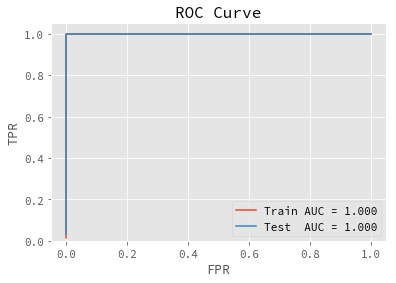

In [513]:
draw_roc_curve(best_model, X_train_pca, y_train, X_test_pca, y_test)

LOFによる教師なしでの異常検知モデル作成


In [493]:
#------------------
#データ整形
#------------------

#★★★下記のコードを完成させてください
#教師なし学習のため、正解ラベル(type列)除外
X_normal = df_normal.
X_bearing = df_bearing.

#標準化
scaler = #★★★
X_normal_scl = 　#★★★
X_bearing_scl = 　#★★★

#PCAによる次元圧縮
pca_lof = PCA(n_components = 20, whiten = True)
X_normal_pca = 　#★★★
X_bearing_pca = 　#★★★


#累積寄与率確認
print('PCA後の累積寄与率 : {:.3f}'.format()　#★★★

0.449834344406


In [490]:
#----------------------------
# 学習、異常スコア計算関数定義
#----------------------------

#モデル訓練用関数
def train_lof(X, n_neighbors):
    lof = LocalOutlierFactor(n_neighbors = n_neighbors)
    return  #★★★訓練結果を返す

#異常スコア計算関数
def calc_anomaly_score(X, model):
    anomaly_score = - model._decision_function(X)
    return anomaly_score

In [491]:
#------------------------------------------
# 正常データによる学習と異常スコア算出
#------------------------------------------

#正常データを使用してモデル学習
lof = #★★★上で定義した関数を使用してください

#異常スコア算出
normal_score  = #★★★上で定義した関数を使用してください
bearing_score = #★★★上で定義した関数を使用してください

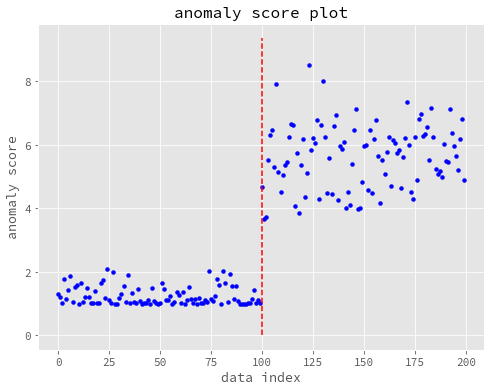

In [492]:
#------------------
# 結果可視化
#------------------
n_data = len(normal_score) + len(bearing_score)
score = 　#★★★normal_scoreとbearing_scoreを横連結
plt.figure(figsize = (8, 6))
plt.scatter(range(n_data), score, color = 'b', s = 15)
plt.vlines(x = 100, ymin = 0, ymax = score.max() * 1.1, linestyle = '--', color = 'r')
plt.title('anomaly score plot')
plt.ylabel('anomaly score')
plt.xlabel('data index')
plt.show()